In [49]:
import pandas as pd
import numpy as np
import re
import nltk

In [50]:
train  = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\LeaveOneOut\leave_trac.csv')
test = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\UniformClasses\Clean\trac.csv')

In [51]:
train.dropna(inplace=True)
# indices_to_keep_train = ~train.isin([np.nan, np.inf, -np.inf]).any(1)
# train = train[indices_to_keep_train].astype(np.float64)

In [52]:
test.dropna(inplace=True)
# indices_to_keep_test = ~test.isin([np.nan, np.inf, -np.inf]).any(1)
# test = test[indices_to_keep_test].astype(np.float64)

In [53]:
train = train[['Text','Class']]
train

,Text,Class
0,rt mayasolov woman shouldnt complain clean ho...,NOT
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,OFF
2,rt urkindofbrand dawg rt ever fuck bitch sta...,OFF
3,rt cganderson vivabas look like tranni,OFF
4,rt shenikarobert shit hear might true might f...,OFF
...,...,...
265226,second time ask view complet contradict covera...,NOT
265227,asham horribl thing put talk page,NOT
265228,spitzer umm there actual articl prostitut ring...,NOT
265229,look like actual put speedi first version dele...,NOT


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

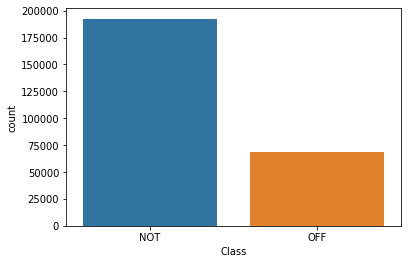

In [54]:
import seaborn as sns
sns.countplot('Class',data=train)

In [55]:
test = test[['Text','Class']]
test

,Text,Class
0,swear iâ€™m get place nick time itâ€™ exhaust ...,NOT
1,iâ€™m immigr â€” trump right immigr give ins...,NOT
2,illegalimmigr illegalalien electoralsystem ele...,OFF
3,drudgereport invas issu mexican buildthatwal,OFF
4,worker charg sexual molest eight children immi...,NOT
...,...,...
3996,gaddaron se yahi sahi hain,NOT
3997,saw news read comment smile thought must n...,OFF
3998,u guy crack joke cant take cridibl indian arm ...,OFF
3999,media fellow time dissect one social media pro...,OFF


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

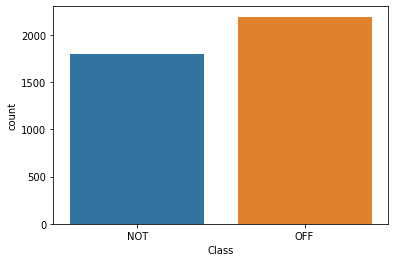

In [56]:
sns.countplot('Class',data=test)

In [57]:
# text = data['Text']
# label = data['Class']

In [58]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(text, label, random_state=42)
# print(len(x_train), len(y_train))
# print(len(x_test), len(y_test))

In [59]:
x_train = train['Text']
y_train = train['Class']
x_test = test['Text']
y_test = test['Class']

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

261473 261473
3994 3994


In [60]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
x_train_vectorizer=count.fit_transform((x_train).values.astype('str'))


In [ ]:
x_test_vectorizer=count.transform(x_test.values.astype('str'))
# x_train_vectorizer.toarray()

In [ ]:
count.vocabulary_

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

# x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

In [ ]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))